<a href="https://colab.research.google.com/github/rana14ce/Dataset-of-the-Multinational-Pile/blob/main/GitHub_XGBoost_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost pyswarm

In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
url = 'https://raw.githubusercontent.com/rana14ce/Dataset-of-the-Multinational-Pile/main/Dataset%20of%20the%20Multinational%20Pile.csv'
data = pd.read_csv(url)

df = pd.DataFrame(data)
X = df.drop('Qm_KN', axis=1)
y = df['Qm_KN']



In [ ]:
# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model with regularization
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=3,            # Simpler trees
    gamma=0.5,              # More conservative
    learning_rate=0.05,     # Slower learning
    subsample=0.8,
    colsample_bytree=0.8,   # Column subsampling
    reg_alpha=0.1,          # L1 regularization
    reg_lambda=1.0,         # L2 regularization
    random_state=42
)

# Train and evaluate
xgb_model.fit(X_train_scaled, y_train)
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    vaf = (1 - np.var(y_true - y_pred) / np.var(y_true)) * 100
    return r2, rmse, vaf

r2_train, rmse_train, vaf_train = calculate_metrics(y_train, y_train_pred)
r2_test, rmse_test, vaf_test = calculate_metrics(y_test, y_test_pred)

print(f"Training R²: {r2_train:.4f}, RMSE: {rmse_train:.4f}, VAF: {vaf_train:.4f}")
print(f"Testing R²: {r2_test:.4f}, RMSE: {rmse_test:.4f}, VAF: {vaf_test:.4f}")

# Cross-validation
scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("Cross-validated R²:", np.mean(scores))

Training R²: 0.9502, RMSE: 254.7900, VAF: 95.0288
Testing R²: 0.5859, RMSE: 886.1110, VAF: 59.0417
Cross-validated R²: 0.11451630592346192


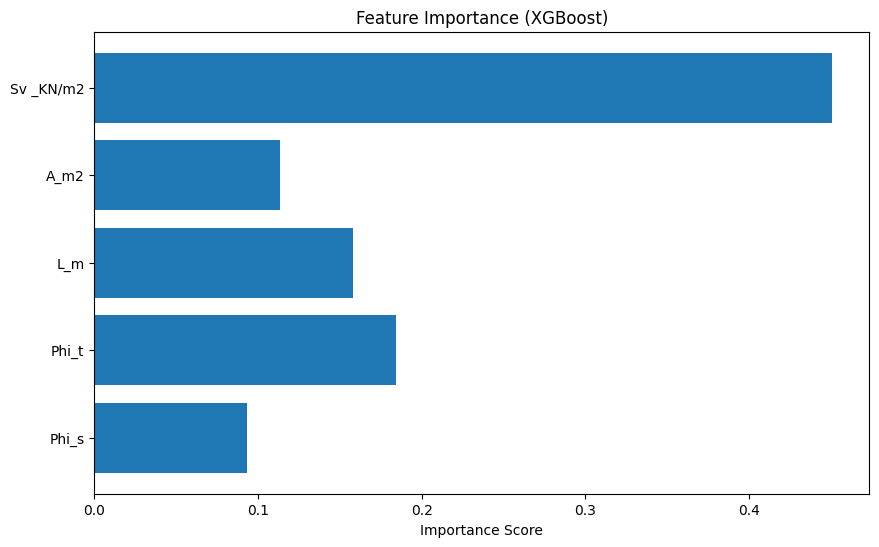

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_model.feature_importances_)
plt.xlabel('Importance Score')
plt.title('Feature Importance (XGBoost)')
plt.show()